In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import glob

from render_blender_main import test_render, append_path_to_model

In [2]:
test_render(
    save_dir='./bunny_views', 
    file_path='../data/bunny.obj', 
    category='', curr_model_id='', 
    width=256, height=256, num_rendering=6, max_camera_dist=1.75, 
    object_scale=2.3, generate_depth=True,
)

WARN (bgl): source/blender/python/generic/bgl.c:2654 BPyInit_bgl: 'bgl' imported without an OpenGL backend. Please update your add-ons to use the 'gpu' module. In Blender 4.0 'bgl' will be removed.
(  0.0001 sec |   0.0001 sec) Importing OBJ '../data/bunny.obj'...
  (  0.0005 sec |   0.0004 sec) Parsing OBJ file...
    (  0.0545 sec |   0.0541 sec) Done, loading materials and images...
    (  0.0556 sec |   0.0551 sec) Done, building geometries (verts:2503 faces:4968 materials: 1 smoothgroups:0) ...
    (  0.0916 sec |   0.0911 sec) Done.
  (  0.0917 sec |   0.0916 sec) Finished importing: '../data/bunny.obj'
Progress: 100.00%



EGL Error (0x3001): EGL_NOT_INITIALIZED: EGL is not initialized, or could not be initialized, for the specified EGL display connection.

Managed to successfully fallback to surfaceless EGL rendering!

EGL Error (0x3009): EGL_BAD_MATCH: Arguments are inconsistent (for example, a valid context requires buffers not supplied by a valid surface).
EGL Error (0x3001): EGL_NOT_INITIALIZED: EGL is not initialized, or could not be initialized, for the specified EGL display connection.

Managed to successfully fallback to surfaceless EGL rendering!



Fra:1 Mem:14.69M (Peak 15.78M) | Time:00:00.29 | Syncing Light
Fra:1 Mem:14.69M (Peak 15.78M) | Time:00:00.29 | Syncing Camera
Fra:1 Mem:14.69M (Peak 15.78M) | Time:00:00.29 | Syncing RotCenter
Fra:1 Mem:14.69M (Peak 15.78M) | Time:00:00.29 | Syncing New Light
Fra:1 Mem:14.70M (Peak 15.78M) | Time:00:00.29 | Syncing bunny
Fra:1 Mem:15.15M (Peak 15.78M) | Time:00:00.34 | Rendering 1 / 64 samples
Fra:1 Mem:14.81M (Peak 15.78M) | Time:00:02.30 | Rendering 26 / 64 samples
Fra:1 Mem:14.81M (Peak 15.78M) | Time:00:03.22 | Rendering 51 / 64 samples
Fra:1 Mem:14.81M (Peak 15.78M) | Time:00:03.72 | Rendering 64 / 64 samples
Fra:1 Mem:14.03M (Peak 16.06M) | Time:00:03.76 | Compositing
Fra:1 Mem:14.03M (Peak 16.06M) | Time:00:03.76 | Compositing | Determining resolution
Fra:1 Mem:14.03M (Peak 16.06M) | Time:00:03.76 | Compositing | Initializing execution
Fra:1 Mem:14.34M (Peak 16.06M) | Time:00:03.76 | Compositing | Tile 1-1
Fra:1 Mem:14.28M (Peak 16.06M) | Time:00:03.76 | Compositing | De-initia

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import minexr

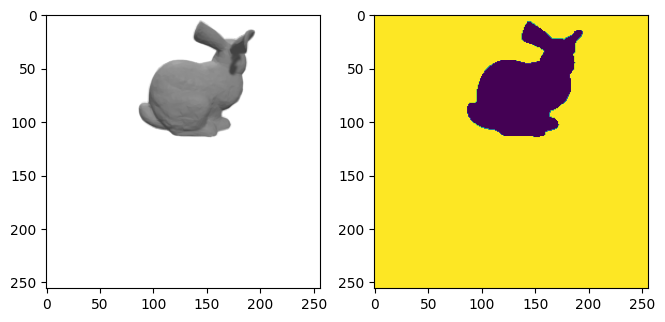

In [4]:
img = Image.open('./bunny_views/rendering/00.png')

with open('./bunny_views/rendering/00_depth_0001.exr', 'rb') as fp:
        reader = minexr.load(fp)
        depth_np = reader.select(['R'])

fig = plt.figure(figsize=(12,12))
        
plt.subplot(131)
plt.imshow(img)

plt.subplot(132)
plt.imshow(depth_np)

((256, 256, 1), <matplotlib.image.AxesImage at 0x7f04d43af010>)

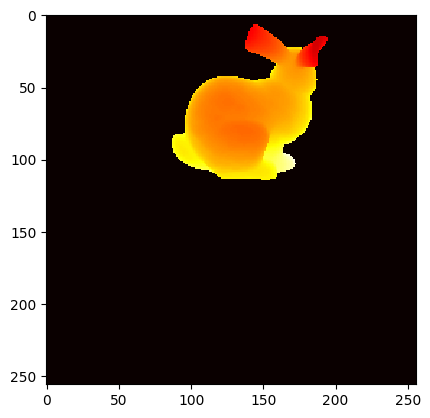

In [5]:
# Invert values on depth image
mask_background = depth_np > 1_000
arr = depth_np.copy()
arr[mask_background] = 0
arr.shape, plt.imshow(arr ** 5, cmap='hot', interpolation='nearest')